<a href="https://colab.research.google.com/github/emanuel379/Inferencia-Estatistica/blob/main/Atividade_2_SME0818_Infer%C3%AAncia_Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 2 - SME0818 - Inferência Estatística

Amanda Caroline de Oliveira Pires - 12559090

Emanuel Victor da Silva Favorato - 12558151



3.05
Optimization terminated successfully.
         Current function value: 103.863745
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 13
         Hessian evaluations: 0
Estimativa de Máxima Verossimilhança de θ: 2.879248147397616


<ipython-input-1-417f8f7a65fb>:28: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  g = derivative(verossimilhanca,
<ipython-input-1-417f8f7a65fb>:28: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  g = derivative(verossimilhanca,


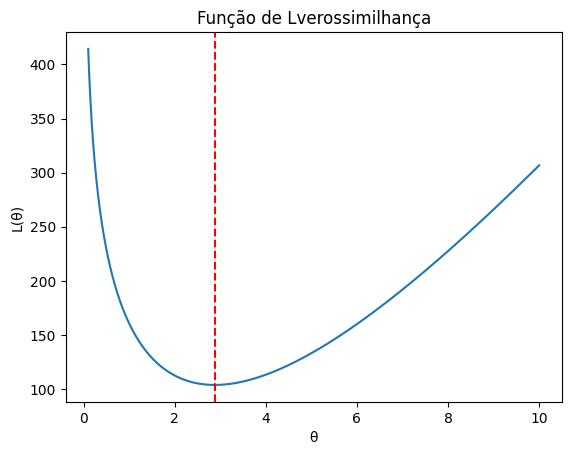

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import poisson
from scipy.misc import derivative
import numpy as np
import statistics as st
import seaborn as sns

# Amostra observada

dados = [8, 3, 3, 1, 4, 3, 3, 2, 2, 3, 3, 1, 1, 3, 5,
         3, 3, 3, 7, 3,
         4 ,3 ,2 ,2 ,4,
         3 ,1 ,4 ,1 ,5 ,3 ,3,
         2 ,3 ,3 ,1 ,3 ,1 ,2 ,2 ,2 ,5 ,3 ,4 ,5 ,2 ,1 ,2,
         4 ,2 ,3 ,5 ,5 ,2 ,2 ,5 ,3 ,4 ,3 ,5]

# Função de verossimilhança e Log-Verossimilhança

def verossimilhanca(theta):
    L = -np.sum(np.log(poisson.pmf(dados,
                                    theta[0])/(1-np.exp(-theta[0]))))
    return L

# Derivada da função de verossimilhança

def gradiente(theta):
    g = derivative(verossimilhanca,
                   theta,
                   dx=1e-6)
    return g

# Estimativa inicial para o parâmetro θ
# Vamos utilizar a média amostral como "chute inicial"

media_amostral = st.mean(dados)
print(media_amostral)

theta_inicial = [3.05]

# Otimização para encontrar a Estimativa de Máxima Verossimilhança de θ
# pelo método de Newton Raphson

resultado = minimize(verossimilhanca,
                     theta_inicial,
                     method='Newton-CG',
                     jac=gradiente,
                     options={'disp': True,
                              'xtol':1e-5})

# Estimativa de Máxima Verossimilhança de θ
theta_mle = resultado.x[0]

print(f"Estimativa de Máxima Verossimilhança de θ: {theta_mle}")

# Valores de θ para plotar a função de verossimilhança
theta_valores = np.linspace(0.1,10,1000)

# Valores da função de verossimilhança para cada valor de θ
L_valores = [verossimilhanca([theta]) for theta in theta_valores]

# Plot da função de verossimilhança
plt.plot(theta_valores,L_valores)
plt.axvline(theta_mle,color='red',linestyle='--')
plt.xlabel('θ')
plt.ylabel('L(θ)')
plt.title('Função de Lverossimilhança')
plt.show()

Frequência observada: [8, 13, 22, 7, 8, 2]
Frequência esperada: [10.282487733592511, 14.80291687879247, 14.207090333114708, 10.226434630382771, 5.888888592802483, 4.406634719265616]


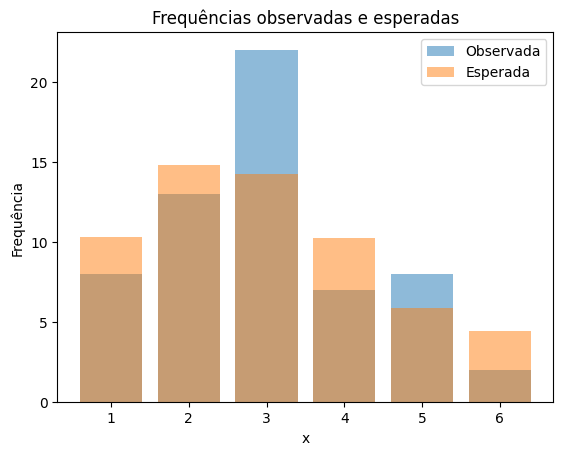

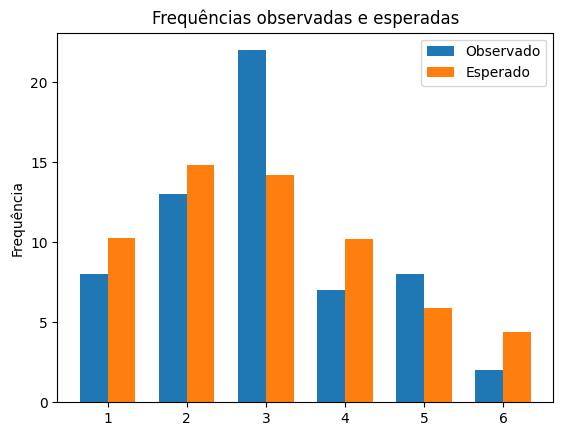

In [ ]:
# Frequência observada
frequencia_observada = np.bincount(dados)[1:]

# Frequência esperada
frequencia_esperada = poisson.pmf(range(1,len(frequencia_observada)+1),
                                   theta_mle)/(1-np.exp(-theta_mle))*len(dados)

# Cálculo da frequência esperada, acumulada para xi >= 6
frequencia_esperada = list(frequencia_esperada)

freq_esperada_ajust = []
for i in frequencia_esperada:
  if i < 5:
    freq_esperada_ajust.append(i)
  sum = np.sum(freq_esperada_ajust)

freq_esperada_ajust
frequencia_esperada.append(sum)

for i in freq_esperada_ajust:
  frequencia_esperada.remove(i)

# Cálculo da frequência observada, acumulada para xi >= 6
frequencia_observada = list(frequencia_observada)

freq_obs_ajust = []
for i in frequencia_observada:
  if i < 5:
    freq_obs_ajust.append(i)
  sum = np.sum(freq_obs_ajust)

freq_obs_ajust
frequencia_observada.append(sum)

for i in freq_obs_ajust:
  frequencia_observada.remove(i)

print(f"Frequência observada: {frequencia_observada}")
print(f"Frequência esperada: {frequencia_esperada}")

# Plot das frequências observadas e esperadas sobrepostas
x = range(1,len(frequencia_observada)+1)
plt.bar(x,frequencia_observada,alpha=0.5,label='Observada')
plt.bar(x,frequencia_esperada,alpha=0.5,label='Esperada')
plt.xlabel('x')
plt.ylabel('Frequência')
plt.title('Frequências observadas e esperadas')
plt.legend()
plt.show()

# Definindo a largura das barras
largura = 0.35

# Definindo a posição das barras no eixo x
posicao_barras = np.arange(len(frequencia_observada))

# Plotando as barras
fig, ax = plt.subplots()
barras_observadas = ax.bar(posicao_barras - largura/2, frequencia_observada,
                            largura,label='Observado')
barras_esperadas = ax.bar(posicao_barras + largura/2,frequencia_esperada,
                            largura,label='Esperado')

# Adicionando legendas e títulos
ax.set_ylabel('Frequência')
ax.set_title('Frequências observadas e esperadas')
ax.set_xticks(posicao_barras)
ax.set_xticklabels([str(i) for i in range(1,len(frequencia_observada)+1)])
ax.legend()

plt.show()